<a href="https://colab.research.google.com/github/JheniferBritto/elas-tech-spotify-data-analysis/blob/main/Aula_1_%7C_Elas%2BTech_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 🎧 Explorando dados do Spotify

<img src="https://media0.giphy.com/media/v1.Y2lkPTc5MGI3NjExaWJtNjFxcmJ6YXk4eDAyMXVyc3o3cGF2NGF6czhkaXl1anAzNzU0ciZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/bgDd8eRNi6NK8/giphy.gif" width="300">


Aqui, vamos explorar dados extraídos da conta de um usuário do Spotify para entender um pouco do seu perfil e gosto musical. Trabalharemos com dois datasets:
1. **playlists_tracks**: contém a listagem de todas as suas playlists públicas e as músicas contidas nelas
2. **genres_artists**: contém a listagem de artistas presentes nas playlists e seus gêneros

In [567]:
import pandas as pd

df_playlist = pd.read_csv('/content/playlists_tracks')
df_genres = pd.read_csv('/content/genres_artists')

In [568]:
df_playlist.head()

,Unnamed: 0,playlist_id,playlist_name,track_id,track_name,artist_names,album_name,album_release_date,popularity,duration_ms
0,0,2VhIiQbHHMKRPEeCukaeZt,Climinha de presencial,59WN2psjkt1tyaxjspN8fp,Killing In The Name,Rage Against The Machine,Rage Against The Machine - XX (20th Anniversar...,1992,79,313573
1,1,2VhIiQbHHMKRPEeCukaeZt,Climinha de presencial,2DlHlPMa4M17kufBvI2lEN,Chop Suey!,System Of A Down,Toxicity,2001-09-04,85,210240
2,2,2VhIiQbHHMKRPEeCukaeZt,Climinha de presencial,3DwQ7AH3xGD9h65ezslm6q,Enter Sandman - Remastered 2021,Metallica,Metallica (Remastered Deluxe Box Set),2021-09-10,83,331560
3,3,2VhIiQbHHMKRPEeCukaeZt,Climinha de presencial,1VNWaY3uNfoeWqb5U8x2QX,Lonely Day,System Of A Down,Hypnotize,2005-11-22,82,167906
4,4,2VhIiQbHHMKRPEeCukaeZt,Climinha de presencial,6capuHDLxgoUUjDD0UhAgN,Holiday in Cambodia,Dead Kennedys,Give Me Convenience or Give Me Death,1987-06-15,53,224866


In [569]:
df_genres.head()

,Unnamed: 0,artist_name,genres
0,0,Rage Against The Machine,"rap metal, rap rock, alternative metal, nu metal"
1,1,System Of A Down,"nu metal, metal, alternative metal, rap metal,..."
2,2,Metallica,"metal, thrash metal, rock, heavy metal, hard rock"
3,3,Dead Kennedys,"punk, hardcore punk, skate punk, proto-punk"
4,4,The Hives,garage rock


In [570]:
df_playlist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8661 entries, 0 to 8660
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          8661 non-null   int64 
 1   playlist_id         8661 non-null   object
 2   playlist_name       8661 non-null   object
 3   track_id            8661 non-null   object
 4   track_name          8659 non-null   object
 5   artist_names        8659 non-null   object
 6   album_name          8659 non-null   object
 7   album_release_date  8661 non-null   object
 8   popularity          8661 non-null   int64 
 9   duration_ms         8661 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 676.8+ KB


In [571]:
print(df_playlist.isnull().sum())

Unnamed: 0            0
playlist_id           0
playlist_name         0
track_id              0
track_name            2
artist_names          2
album_name            2
album_release_date    0
popularity            0
duration_ms           0
dtype: int64


In [572]:
df_playlist.dropna(subset='track_name', inplace=True)

In [573]:
df_playlist.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8659 entries, 0 to 8660
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          8659 non-null   int64 
 1   playlist_id         8659 non-null   object
 2   playlist_name       8659 non-null   object
 3   track_id            8659 non-null   object
 4   track_name          8659 non-null   object
 5   artist_names        8659 non-null   object
 6   album_name          8659 non-null   object
 7   album_release_date  8659 non-null   object
 8   popularity          8659 non-null   int64 
 9   duration_ms         8659 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 744.1+ KB


In [574]:
df_playlist['album_release_date'] = pd.to_datetime(df_playlist['album_release_date'], errors='coerce')

In [575]:
df_playlist.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8659 entries, 0 to 8660
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Unnamed: 0          8659 non-null   int64         
 1   playlist_id         8659 non-null   object        
 2   playlist_name       8659 non-null   object        
 3   track_id            8659 non-null   object        
 4   track_name          8659 non-null   object        
 5   artist_names        8659 non-null   object        
 6   album_name          8659 non-null   object        
 7   album_release_date  629 non-null    datetime64[ns]
 8   popularity          8659 non-null   int64         
 9   duration_ms         8659 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 744.1+ KB


In [576]:
data = df_playlist['album_release_date'].dropna().map(pd.Timestamp.toordinal).median()

In [577]:
df = pd.Timestamp.fromordinal(int(data))

In [578]:
df_playlist['album_release_date'].fillna(df, inplace=True)

/tmp/ipython-input-813672269.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_playlist['album_release_date'].fillna(df, inplace=True)


In [579]:
df_playlist.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8659 entries, 0 to 8660
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Unnamed: 0          8659 non-null   int64         
 1   playlist_id         8659 non-null   object        
 2   playlist_name       8659 non-null   object        
 3   track_id            8659 non-null   object        
 4   track_name          8659 non-null   object        
 5   artist_names        8659 non-null   object        
 6   album_name          8659 non-null   object        
 7   album_release_date  8659 non-null   datetime64[ns]
 8   popularity          8659 non-null   int64         
 9   duration_ms         8659 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 744.1+ KB


In [580]:
df_genres.head()

,Unnamed: 0,artist_name,genres
0,0,Rage Against The Machine,"rap metal, rap rock, alternative metal, nu metal"
1,1,System Of A Down,"nu metal, metal, alternative metal, rap metal,..."
2,2,Metallica,"metal, thrash metal, rock, heavy metal, hard rock"
3,3,Dead Kennedys,"punk, hardcore punk, skate punk, proto-punk"
4,4,The Hives,garage rock


In [581]:
df_genres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 934 entries, 0 to 933
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   934 non-null    int64 
 1   artist_name  934 non-null    object
 2   genres       660 non-null    object
dtypes: int64(1), object(2)
memory usage: 22.0+ KB


In [582]:
print(df_genres.isnull().sum())

Unnamed: 0       0
artist_name      0
genres         274
dtype: int64


In [583]:
df_genres.dropna(subset='genres', inplace=True)

In [584]:
df_genres.info()

<class 'pandas.core.frame.DataFrame'>
Index: 660 entries, 0 to 933
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   660 non-null    int64 
 1   artist_name  660 non-null    object
 2   genres       660 non-null    object
dtypes: int64(1), object(2)
memory usage: 20.6+ KB


In [585]:
df_genres['genres'] = df_genres['genres'].str.split(',')

In [586]:
df_genres.head()

,Unnamed: 0,artist_name,genres
0,0,Rage Against The Machine,"[rap metal, rap rock, alternative metal, nu..."
1,1,System Of A Down,"[nu metal, metal, alternative metal, rap me..."
2,2,Metallica,"[metal, thrash metal, rock, heavy metal, h..."
3,3,Dead Kennedys,"[punk, hardcore punk, skate punk, proto-punk]"
4,4,The Hives,[garage rock]


In [587]:
df_novo = df_genres.explode('genres').reset_index(drop=True)

In [588]:
df_novo.head()

,Unnamed: 0,artist_name,genres
0,0,Rage Against The Machine,rap metal
1,0,Rage Against The Machine,rap rock
2,0,Rage Against The Machine,alternative metal
3,0,Rage Against The Machine,nu metal
4,1,System Of A Down,nu metal


In [589]:
df_novo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1515 entries, 0 to 1514
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   1515 non-null   int64 
 1   artist_name  1515 non-null   object
 2   genres       1515 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.6+ KB


## Visualização com Matplotlib

<img src="https://media4.giphy.com/media/v1.Y2lkPTc5MGI3NjExazlycDZvOXZzbXN1Z2djZzZ3cnU0M3FkeXdnbzJxMGdjbmpsZGVseSZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/iRIf7MAdvOIbdxK4rR/giphy.gif" width="300">

Agora que os dados estão limpos, vamos responder algumas perguntas com gráficos.

### Quais playlists têm mais músicas?

In [590]:
df_playlist.columns

Index(['Unnamed: 0', 'playlist_id', 'playlist_name', 'track_id', 'track_name',
       'artist_names', 'album_name', 'album_release_date', 'popularity',
       'duration_ms'],
      dtype='object')

In [591]:
quantidade_musica = df_playlist['playlist_name'].value_counts().reset_index()
quantidade_musica.columns = ['Musicas', 'Quantidade']
quantidade_musica.head()

,Musicas,Quantidade
0,Caminhando sem padrão nenhum,311
1,Rockzim pra cantar junto,300
2,cantando feat. rebolando,274
3,tudo misturado curtindo uma chuva,261
4,Radio em '00,241


In [592]:
organizar = quantidade_musica.sort_values(by='Quantidade', ascending=False).head(5)
organizar.head()

,Musicas,Quantidade
0,Caminhando sem padrão nenhum,311
1,Rockzim pra cantar junto,300
2,cantando feat. rebolando,274
3,tudo misturado curtindo uma chuva,261
4,Radio em '00,241


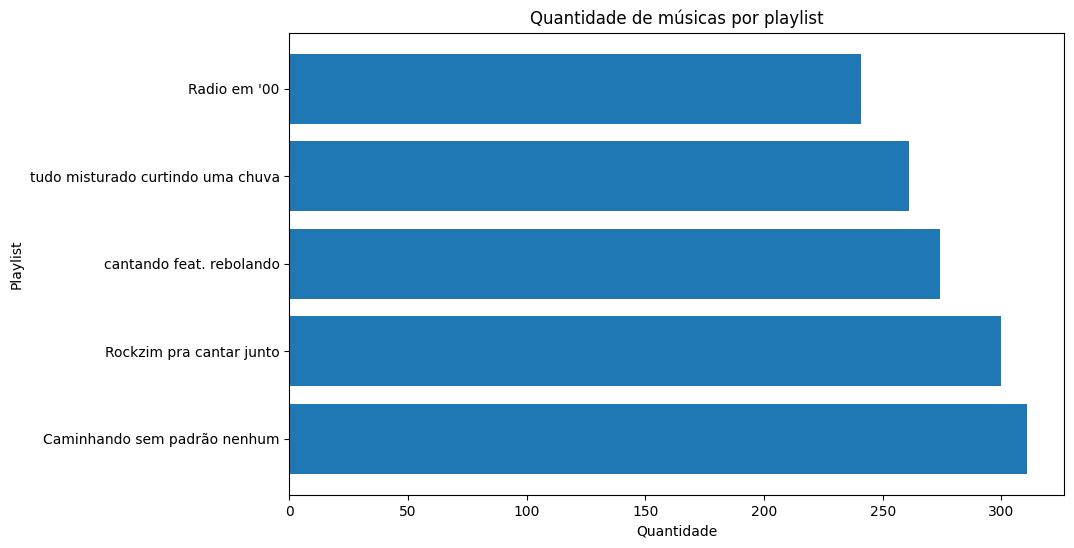

In [593]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.barh(organizar['Musicas'], organizar['Quantidade'])
plt.xlabel('Quantidade')
plt.ylabel('Playlist')
plt.title('Quantidade de músicas por playlist')
plt.show()

### Como evolui a quantidade de músicas lançadas por ano nas playlists?

In [594]:
df_playlist['album_release_ano'] = df_playlist['album_release_date'].dt.year

In [595]:
quantidade = df_playlist['album_release_ano'].value_counts().reset_index()
quantidade.columns = ['Ano', 'Quantidade']
quantidade.head()

,Ano,Quantidade
0,2000,8055
1,2004,42
2,2013,41
3,2009,36
4,1995,34


In [596]:
quantidade = quantidade.sort_values(by='Ano').head(12)


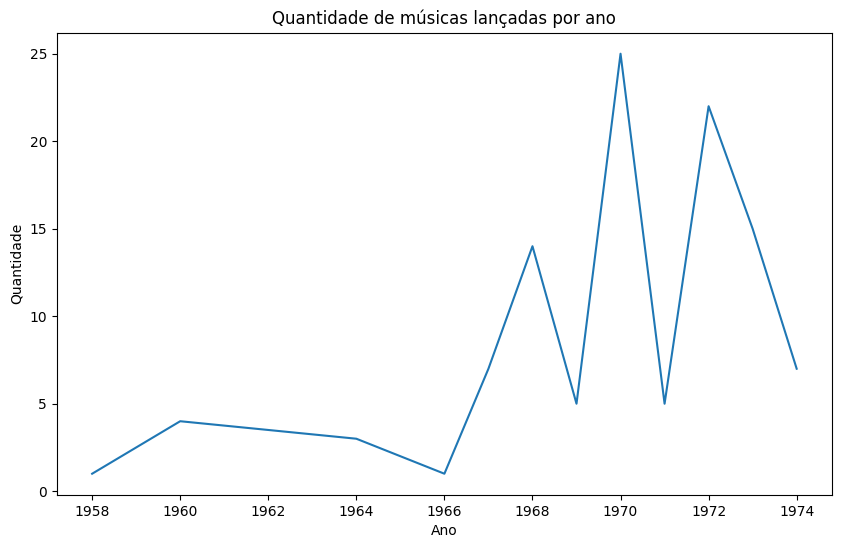

In [597]:
plt.figure(figsize=(10,6))
plt.plot(quantidade['Ano'], quantidade['Quantidade'])
plt.xlabel('Ano')
plt.ylabel('Quantidade')
plt.title('Quantidade de músicas lançadas por ano')
plt.show()

### Quais são os artistas com maior popularidade média?

In [598]:
df_playlist.columns

Index(['Unnamed: 0', 'playlist_id', 'playlist_name', 'track_id', 'track_name',
       'artist_names', 'album_name', 'album_release_date', 'popularity',
       'duration_ms', 'album_release_ano'],
      dtype='object')

In [599]:
artistas_popular = df_playlist.groupby('artist_names')['popularity'].mean().reset_index()
artistas_popular.columns = ['Artistas', 'Popularidade']
df = round(artistas_popular.sort_values(by='Popularidade', ascending=False).head(5),2)
df

,Artistas,Popularidade
1257,The Neighbourhood,91.0
512,"Gorillaz, De La Soul",90.0
452,Fleetwood Mac,89.0
1289,"The Weeknd, Daft Punk",89.0
712,"Kendrick Lamar, SZA",89.0


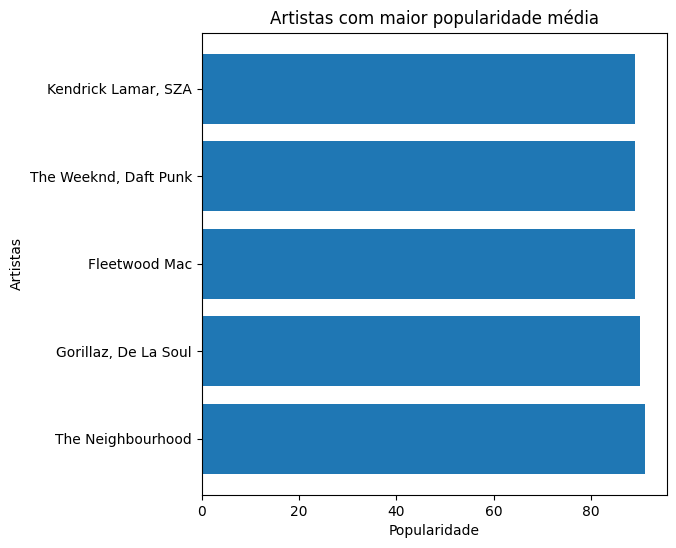

In [600]:
plt.figure(figsize=(6,6))
plt.barh(df['Artistas'], df['Popularidade'])
plt.xlabel('Popularidade')
plt.ylabel('Artistas')
plt.title('Artistas com maior popularidade média')
plt.show()

### Quais são os artistas mais frequentes nas playlists?

In [601]:
df_playlist.columns

Index(['Unnamed: 0', 'playlist_id', 'playlist_name', 'track_id', 'track_name',
       'artist_names', 'album_name', 'album_release_date', 'popularity',
       'duration_ms', 'album_release_ano'],
      dtype='object')

In [602]:
frenquente = df_playlist.groupby('artist_names')['playlist_name'].count().reset_index()
frenquente.columns = ['Artistas', 'Quantidade']
df_frequencia = frenquente.sort_values(by='Quantidade', ascending=False).head(5)
df_frequencia

,Artistas,Quantidade
982,Oasis,160
988,Olivia Dean,159
666,Jungle,143
61,Arctic Monkeys,138
135,Beyoncé,131


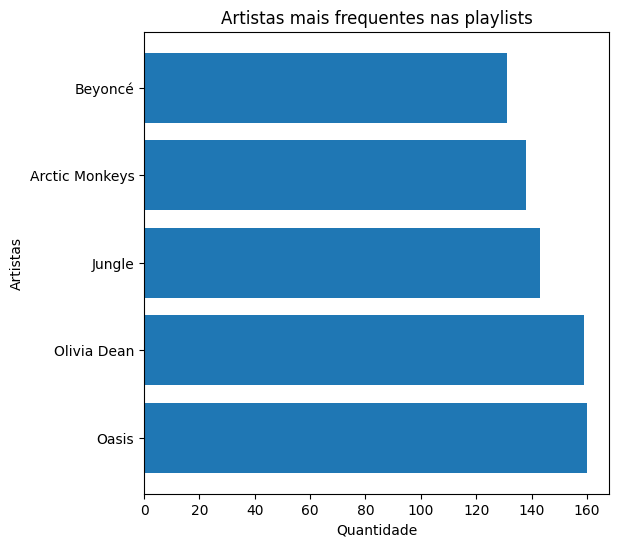

In [603]:
plt.figure(figsize=(6,6))
plt.barh(df_frequencia['Artistas'], df_frequencia['Quantidade'])
plt.xlabel('Quantidade')
plt.ylabel('Artistas')
plt.title('Artistas mais frequentes nas playlists')
plt.show()

### Quais gêneros são mais frequentes entre os artistas das playlists?

In [604]:
df_novo.columns

Index(['Unnamed: 0', 'artist_name', 'genres'], dtype='object')

In [605]:
df_playlist.columns

Index(['Unnamed: 0', 'playlist_id', 'playlist_name', 'track_id', 'track_name',
       'artist_names', 'album_name', 'album_release_date', 'popularity',
       'duration_ms', 'album_release_ano'],
      dtype='object')

In [606]:
df_novo.columns = ['Unnamed: 0', 'artist_names', 'genres' ]

In [607]:
df_atualizado = pd.merge(df_novo, df_playlist, on='artist_names')

In [608]:
df_atualizado.head(2)

,Unnamed: 0_x,artist_names,genres,Unnamed: 0_y,playlist_id,playlist_name,track_id,track_name,album_name,album_release_date,popularity,duration_ms,album_release_ano
0,0,Rage Against The Machine,rap metal,0,2VhIiQbHHMKRPEeCukaeZt,Climinha de presencial,59WN2psjkt1tyaxjspN8fp,Killing In The Name,Rage Against The Machine - XX (20th Anniversar...,1992-01-01,79,313573,1992
1,0,Rage Against The Machine,rap metal,5,2VhIiQbHHMKRPEeCukaeZt,Climinha de presencial,1wsRitfRRtWyEapl0q22o8,Guerrilla Radio,The Battle Of Los Angeles,2000-01-01,71,206200,2000


In [609]:
agrupa_artistas = df_atualizado.groupby('genres')['playlist_name'].count().reset_index()
agrupa_artistas.columns = ['Genres', 'Quantidade']
quantidade_genero = agrupa_artistas.sort_values(by='Quantidade', ascending=False).head(5)

Text(0.5, 1.0, 'Gêneros mais frequentes entre os artistas')

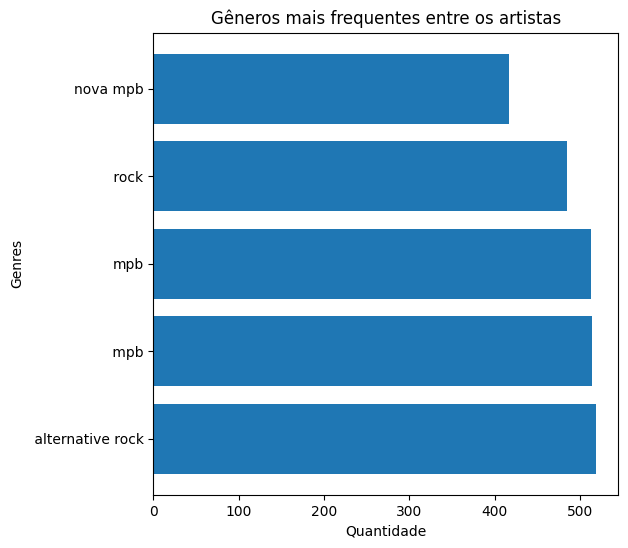

In [610]:
plt.figure(figsize=(6,6))
plt.barh(quantidade_genero['Genres'], quantidade_genero['Quantidade'])
plt.xlabel('Quantidade')
plt.ylabel('Genres')
plt.title('Gêneros mais frequentes entre os artistas')

### Qual é a duração média das músicas por playlist?

In [611]:
df_atualizado.columns

Index(['Unnamed: 0_x', 'artist_names', 'genres', 'Unnamed: 0_y', 'playlist_id',
       'playlist_name', 'track_id', 'track_name', 'album_name',
       'album_release_date', 'popularity', 'duration_ms', 'album_release_ano'],
      dtype='object')

In [617]:
duracão_media = df_atualizado.groupby('playlist_name')['duration_ms'].mean().reset_index()
duracão_media.columns = ['Playlist', 'Duração Média']
duracao = round(duracão_media.sort_values(by='Duração Média', ascending=False).head(5),2)


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.12/dist-packages/matplotlib/pyplot.py'>

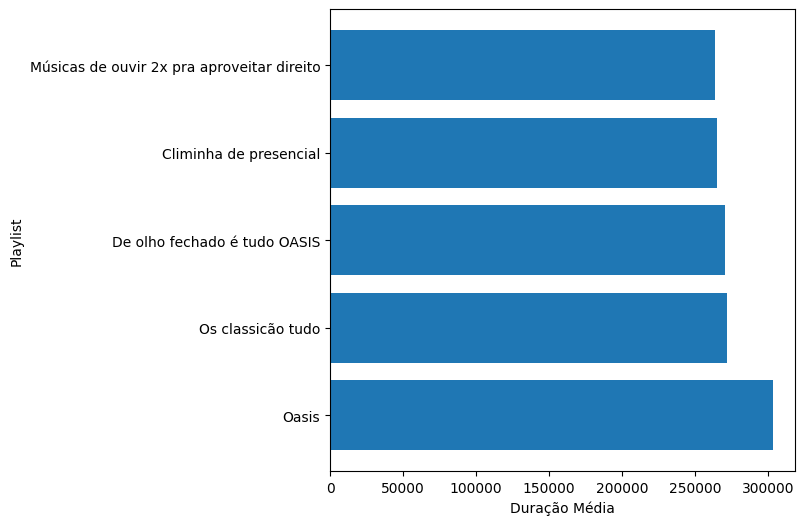

In [618]:
plt.figure(figsize=(6,6))
plt.barh(duracao['Playlist'], duracao['Duração Média'])
plt.xlabel('Duração Média')
plt.ylabel('Playlist')
plt

### Exercício: Existe relação entre o ano de lançamento e a duração média das músicas?

In [624]:
ano = df_atualizado.groupby('album_release_ano')['duration_ms'].mean().reset_index()
ano.columns = ['Ano', 'Duração Média']
media = round(ano.sort_values(by='Ano', ascending=False),2)

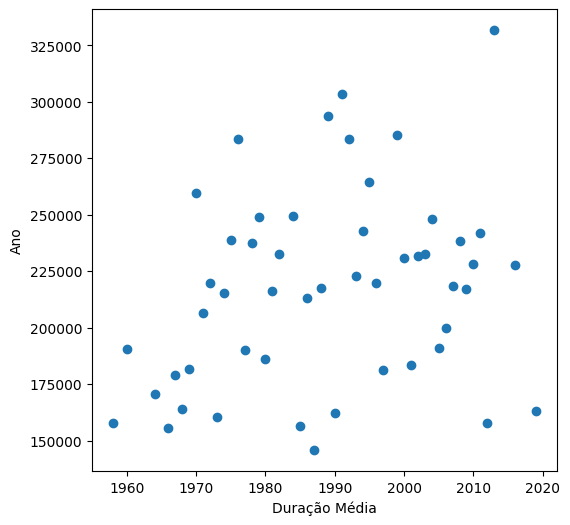

In [625]:
plt.figure(figsize=(6,6))
plt.scatter(media['Ano'], media['Duração Média'])
plt.xlabel('Duração Média')
plt.ylabel('Ano')
plt.show()

Não mostra nenuma relação, mostra que ouve um crescimento de ouvir musica desde 1970 até 2018, pois teve um decaimento 1980 até 1990 e pouco subi na decada de 1990 e pouco e decaiu até 2010 teve uma aumento  

### Exercício: Quão diversa em gêneros é cada playlist?
Em outras palavras, quais playlists têm mais gêneros distintos entre os artistas que aparecem nelas?

In [626]:
genros = df_atualizado.groupby('playlist_name')['genres'].nunique().reset_index()
genros.columns = ['Playlist', 'Quantidade']
quantidade = genros.sort_values(by='Quantidade', ascending=False).head(5)

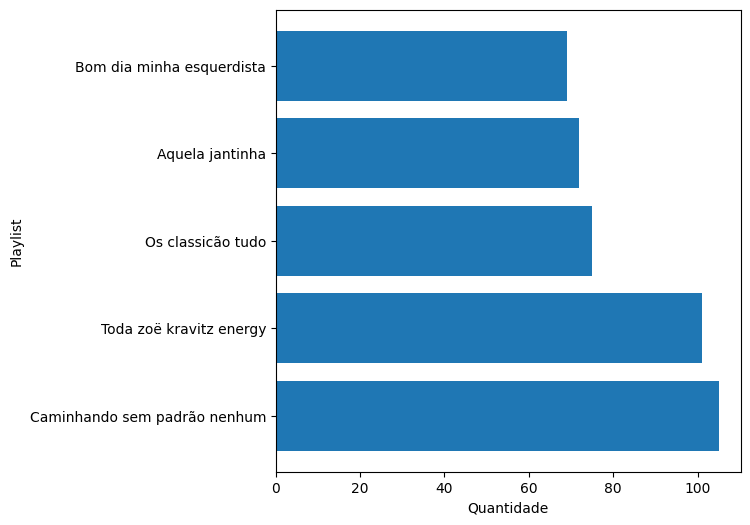

In [627]:
plt.figure(figsize=(6,6))
plt.barh(quantidade['Playlist'], quantidade['Quantidade'])
plt.xlabel('Quantidade')
plt.ylabel('Playlist')
plt.show()

---

<img src="https://media2.giphy.com/media/v1.Y2lkPTc5MGI3NjExMmxwajYzcWh3NmRhNjN0N2plMDV5ZGdrcHQ0ZnlqeW55bTd6NjdnYSZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/lD76yTC5zxZPG/giphy.gif" width="300">